In [22]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("somesh24/spambase")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/spambase


In [23]:
import pandas as pd
import os

# Define the dataset directory
path = "/kaggle/input/spambase"

# Automatically find the file (usually .csv or .data)
data_file = None
for file in os.listdir(path):
    if file.endswith(".csv") or file.endswith(".data"):
        data_file = os.path.join(path, file)
        break

# Sanity check
if data_file is None:
    raise FileNotFoundError("No CSV or DATA file found in the specified directory.")

# Load the dataset
df = pd.read_csv(data_file, header=None)

# Assign column names from UCI documentation
# Define all 58 columns
column_names = [
    # 48 word frequency features
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference',

    # 6 char frequency features
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',

    # 3 capital run length features
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total',

    # Target column
    'spam'
]
df.columns = column_names

# Remove the header row that was loaded as data
df = df.iloc[1:].reset_index(drop=True)

# Verify
print("✅ Dataset loaded from:", data_file)
print("Shape:", df.shape)
display(df.head())

✅ Dataset loaded from: /kaggle/input/spambase/spambase_csv.csv
Shape: (4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,1
1,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
2,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
3,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.137,0,0.137,0,0,3.537,40,191,1
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.135,0,0.135,0,0,3.537,40,191,1


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

# Feature and label split
X = df.drop('spam', axis=1)
y = df['spam'].astype(int)

# Split into train-val-test
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)

# Scale the continuous features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


✅ GaussianNB Best Params: {'var_smoothing': 1e-06}
✅ Best Cross-Val Score: 0.8191962172657284
Validation Report:
               precision    recall  f1-score   support

           0       0.97      0.72      0.83       419
           1       0.69      0.96      0.81       272

    accuracy                           0.82       691
   macro avg       0.83      0.84      0.82       691
weighted avg       0.86      0.82      0.82       691

Test Report:
               precision    recall  f1-score   support

           0       0.97      0.74      0.84       419
           1       0.71      0.96      0.82       272

    accuracy                           0.83       691
   macro avg       0.84      0.85      0.83       691
weighted avg       0.86      0.83      0.83       691



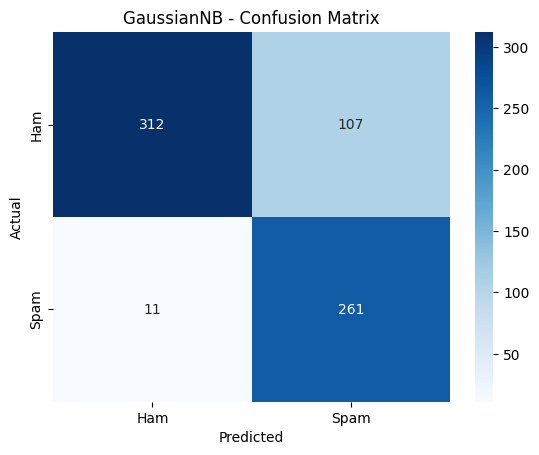

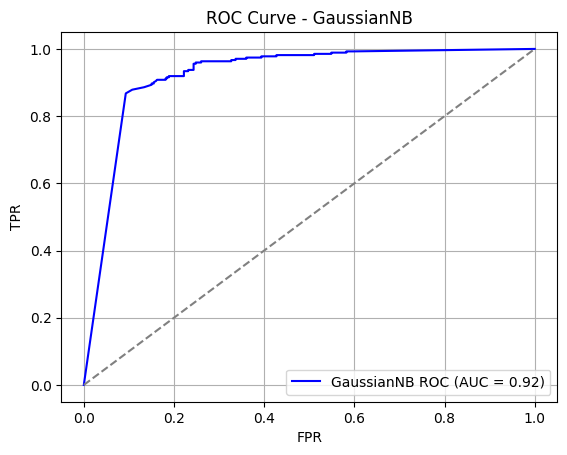

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Define param grid
params = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}
gnb = GaussianNB()

clf = GridSearchCV(gnb, param_grid=params, cv=5, scoring='accuracy')
clf.fit(X_train_scaled, y_train)

# Report
print("✅ GaussianNB Best Params:", clf.best_params_)
print("✅ Best Cross-Val Score:", clf.best_score_)

val_preds = clf.predict(X_val_scaled)
print("Validation Report:\n", classification_report(y_val, val_preds))

test_preds = clf.predict(X_test_scaled)
print("Test Report:\n", classification_report(y_test, test_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("GaussianNB - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_probs = clf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'GaussianNB ROC (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve - GaussianNB')
plt.legend()
plt.grid()
plt.show()


GaussianNB assumes that continuous features follow a normal distribution. It calculates probabilities using the Gaussian (bell curve) formula for each feature given the class.

# -----------------------------------------------------------------------------

MultinomialNB models the distribution of word counts or frequencies, assuming that the number of times a word appears in an email is predictive of the class (spam/ham).

When To Use:
Use MultinomialNB when your features are:

Non-negative counts or frequencies

Like: word_freq_free, word_freq_money, char_freq_!

 Perfect match for Spambase dataset's word_freq_*, char_freq_* columns.

In [26]:
import pandas as pd
import os

# Define the dataset directory
path = "/kaggle/input/spambase"

# Automatically find the file (usually .csv or .data)
data_file = None
for file in os.listdir(path):
    if file.endswith(".csv") or file.endswith(".data"):
        data_file = os.path.join(path, file)
        break

# Sanity check
if data_file is None:
    raise FileNotFoundError("No CSV or DATA file found in the specified directory.")

# Load the dataset
df = pd.read_csv(data_file, header=None)

# Assign column names from UCI documentation
# Define all 58 columns
column_names = [
    # 48 word frequency features
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference',

    # 6 char frequency features
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',

    # 3 capital run length features
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total',

    # Target column
    'spam'
]
df.columns = column_names

# Remove the header row that was loaded as data
df = df.iloc[1:].reset_index(drop=True)

# Verify
print("✅ Dataset loaded from:", data_file)
print("Shape:", df.shape)
display(df.head())

✅ Dataset loaded from: /kaggle/input/spambase/spambase_csv.csv
Shape: (4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,1
1,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
2,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
3,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.137,0,0.137,0,0,3.537,40,191,1
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.135,0,0.135,0,0,3.537,40,191,1


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

# Reload the data to avoid scaled inputs
X = df.drop('spam', axis=1)
y = df['spam'].astype(int)

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)


✅ MultinomialNB Best Params: {'alpha': 0.5, 'fit_prior': True}
✅ Best Cross-Val Score: 0.7946572259304695
Validation Report:
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       419
           1       0.71      0.70      0.71       272

    accuracy                           0.77       691
   macro avg       0.76      0.76      0.76       691
weighted avg       0.77      0.77      0.77       691

Test Report:
               precision    recall  f1-score   support

           0       0.84      0.82      0.83       419
           1       0.73      0.76      0.75       272

    accuracy                           0.80       691
   macro avg       0.79      0.79      0.79       691
weighted avg       0.80      0.80      0.80       691



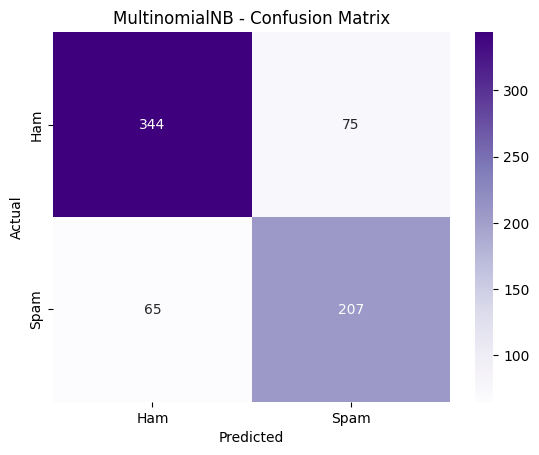

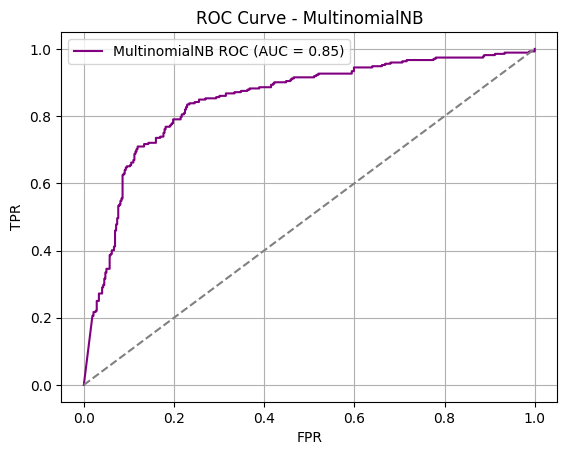

In [28]:
from sklearn.naive_bayes import MultinomialNB

params = {'alpha': [0.1, 0.5, 1.0, 2.0], 'fit_prior': [True, False]}
mnb = MultinomialNB()
clf = GridSearchCV(mnb, param_grid=params, cv=5, scoring='accuracy')
clf.fit(X_train, y_train)

print("✅ MultinomialNB Best Params:", clf.best_params_)
print("✅ Best Cross-Val Score:", clf.best_score_)

val_preds = clf.predict(X_val)
print("Validation Report:\n", classification_report(y_val, val_preds))

test_preds = clf.predict(X_test)
print("Test Report:\n", classification_report(y_test, test_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("MultinomialNB - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_probs = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'MultinomialNB ROC (AUC = {roc_auc:.2f})', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve - MultinomialNB')
plt.legend()
plt.grid()
plt.show()


In [29]:
from sklearn.model_selection import cross_val_score
import numpy as np

cv_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.79261672 0.81847826 0.81304348 0.78913043 0.69673913]
Mean CV Accuracy: 0.7820016050606619


# -------------------------------------------------------------

BernoulliNB is a variant of Naïve Bayes designed for binary features (0 or 1). It models the presence/absence of features rather than counts or frequencies.

In [30]:
import pandas as pd
import os

# Define the dataset directory
path = "/kaggle/input/spambase"

# Automatically find the file (usually .csv or .data)
data_file = None
for file in os.listdir(path):
    if file.endswith(".csv") or file.endswith(".data"):
        data_file = os.path.join(path, file)
        break

# Sanity check
if data_file is None:
    raise FileNotFoundError("No CSV or DATA file found in the specified directory.")

# Load the dataset
df = pd.read_csv(data_file, header=None)

# Assign column names from UCI documentation
# Define all 58 columns
column_names = [
    # 48 word frequency features
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference',

    # 6 char frequency features
    'char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#',

    # 3 capital run length features
    'capital_run_length_average', 'capital_run_length_longest', 'capital_run_length_total',

    # Target column
    'spam'
]
df.columns = column_names

# Remove the header row that was loaded as data
df = df.iloc[1:].reset_index(drop=True)

# Verify
print("✅ Dataset loaded from:", data_file)
print("Shape:", df.shape)
display(df.head())

✅ Dataset loaded from: /kaggle/input/spambase/spambase_csv.csv
Shape: (4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0,0.64,0.64,0,0.32,0,0,0,0,0,...,0,0,0,0.778,0,0,3.756,61,278,1
1,0.21,0.28,0.5,0,0.14,0.28,0.21,0.07,0,0.94,...,0,0.132,0,0.372,0.18,0.048,5.114,101,1028,1
2,0.06,0,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0,0.276,0.184,0.01,9.821,485,2259,1
3,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.137,0,0.137,0,0,3.537,40,191,1
4,0,0,0,0,0.63,0,0.31,0.63,0.31,0.63,...,0,0.135,0,0.135,0,0,3.537,40,191,1


In [31]:
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

X = df.drop('spam', axis=1)
y = df['spam'].astype(int)

# Binarize all features using threshold = 0
binarizer = Binarizer(threshold=0.0)
X_bin = binarizer.fit_transform(X)

# Train-test split (same structure)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_bin, y, test_size=0.15, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, stratify=y_train_val, random_state=42)


✅ BernoulliNB Best Parameters: {'alpha': 0.5, 'binarize': 0.0, 'fit_prior': False}
✅ Best Cross-Val Accuracy: 0.8853655709359274
📊 Validation Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       419
           1       0.91      0.84      0.87       272

    accuracy                           0.90       691
   macro avg       0.90      0.89      0.90       691
weighted avg       0.90      0.90      0.90       691

📊 Test Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       419
           1       0.87      0.83      0.85       272

    accuracy                           0.89       691
   macro avg       0.88      0.88      0.88       691
weighted avg       0.89      0.89      0.89       691



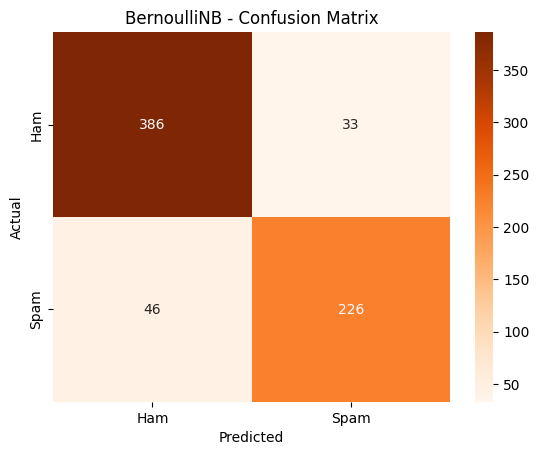

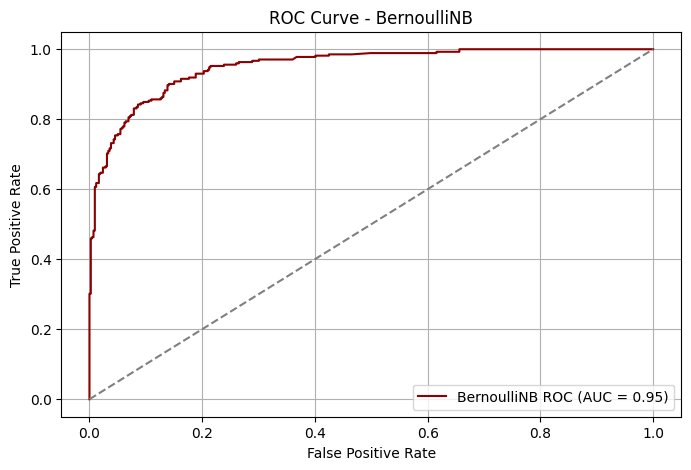

In [32]:
# Apply binarization
binarizer = Binarizer()
X_train_bin = binarizer.fit_transform(X_train)
X_val_bin = binarizer.transform(X_val)
X_test_bin = binarizer.transform(X_test)

# Grid SearchCV
params = {
    'alpha': [0.1, 0.5, 1.0],
    'fit_prior': [True, False],
    'binarize': [0.0, 0.5, 1.0]
}
bnb = BernoulliNB()
clf = GridSearchCV(bnb, param_grid=params, cv=5, scoring='accuracy')
clf.fit(X_train_bin, y_train)

print("✅ BernoulliNB Best Parameters:", clf.best_params_)
print("✅ Best Cross-Val Accuracy:", clf.best_score_)

# Validation performance
val_preds = clf.predict(X_val_bin)
print("📊 Validation Classification Report:")
print(classification_report(y_val, val_preds))

# Test performance
test_preds = clf.predict(X_test_bin)
print("📊 Test Classification Report:")
print(classification_report(y_test, test_preds))

# Confusion Matrix
cm = confusion_matrix(y_test, test_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title("BernoulliNB - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
y_probs = clf.predict_proba(X_test_bin)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'BernoulliNB ROC (AUC = {roc_auc:.2f})', color='darkred')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - BernoulliNB')
plt.legend()
plt.grid()
plt.show()